In [1]:
import torch
import matplotlib.pyplot as plt
from time import perf_counter

# 线性回归

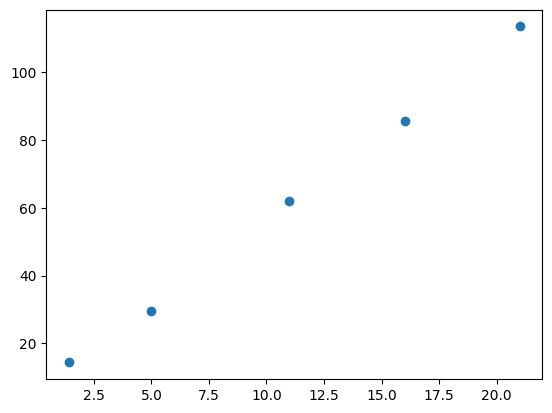

In [2]:
x=torch.Tensor([1.4,5,11,16,21])
y=torch.Tensor([14.4,29.6,62,85.5,113.4])

plt.scatter(x.numpy(), y.numpy())
plt.show()

## 目标函数: 
$\hat y=w_1x+w_0$ 

## 损失函数：Mean Squared Error
$L(w_1,w_0)=\sum_{i=1}^n(\hat y_{i}-y_{i})=\sum_{i=1}^n(w_1x_i+w_0-y_i)^2$

## 优化方法：梯度下降
## 梯度
$\nabla L = (\frac{\partial L}{\partial w_1}, \frac{\partial L}{\partial w_0})$

## 进行一次梯度下降
$w^{t+1}_1 = w^t_1-\frac{\partial L}{\partial w_1}$

$w^{t+1}_0 = w^t_0-\frac{\partial L}{\partial w_0}$

向量形式： $\overrightarrow {w}^{t+1} = \overrightarrow {w}^{t} - \nabla L(\overrightarrow {w}^{t}) \times \delta$

学习率: $\delta$

1. 前向传播：
    1. 将输入$\overrightarrow x$和参数$\overrightarrow w$按照直线公式计算出输出$\overrightarrow {\hat y}$
    2. 将输出$\overrightarrow {\hat y}$和$\overrightarrow y$输入损失函数后得到损失值L。
2. 反向传播：求出损失值的梯度向量 $\nabla L$, 然后用梯度下降法更新参数$\overrightarrow w$

## 训练：
通过不断地进行前向传播和反向传播，对参数$\overrightarrow w$进行调优，最终让损失函数的损失值L达到最小的过程

In [30]:
def produce_x(x):
    '''
    将一维的x转换为二维 第二维填充用于常数W0的系数1
    '''
    x0 = torch.ones(x.numpy().size)
    X = torch.stack((x,x0), dim=1)
    return X

def draw(output, loss):
    plt.cla()
    plt.scatter(x.numpy(), y.numpy())
    plt.plot(x.numpy(), output.data.numpy(), 'r-', lw=5)
    plt.xlabel(f"loss={loss.item()}", fontdict={'size': 20, 'color': 'red'})
    # plt.text(1.50, 0, s=f"loss={loss.item()}", fontdict={'size': 20, 'color': 'red'})
    plt.pause(0.005)

def train(inputs, target, w, epochs=1, learning_rate=0.01):
    output = None
    for epoch in range(epochs):
        output = inputs.mv(w)
        loss = (output-target).pow(2).sum() # 计算MSE

        loss.backward()
        w.data -= learning_rate * w.grad
        w.grad.zero_()
    if output is not None:
        output_cpu = output.cpu()
        draw(output_cpu, loss)
    return w, loss

def try_cuda(inputs, outputs, paramters):
    CUDA = torch.cuda.is_available()
    if CUDA:
        inputs = inputs.cuda()
        outputs = outputs.cuda()
        paramters = paramters.cuda()
    paramters.requires_grad=True
    return inputs, outputs, paramters
    

tensor([ 1.4000,  5.0000, 11.0000, 16.0000, 21.0000])
tensor([[ 1.4000,  1.0000],
        [ 5.0000,  1.0000],
        [11.0000,  1.0000],
        [16.0000,  1.0000],
        [21.0000,  1.0000]])
tensor([0.9183, 0.9591], requires_grad=True)
tensor(16877.9316, grad_fn=<SumBackward0>)
tensor(38.1377, grad_fn=<SumBackward0>)
tensor(36.3997, grad_fn=<SumBackward0>)
tensor(34.7624, grad_fn=<SumBackward0>)
tensor(33.2199, grad_fn=<SumBackward0>)
tensor(31.7668, grad_fn=<SumBackward0>)
tensor(30.3978, grad_fn=<SumBackward0>)
tensor(29.1081, grad_fn=<SumBackward0>)
tensor(27.8932, grad_fn=<SumBackward0>)
tensor(26.7486, grad_fn=<SumBackward0>)
tensor(25.6703, grad_fn=<SumBackward0>)
tensor(24.6544, grad_fn=<SumBackward0>)
tensor(23.6974, grad_fn=<SumBackward0>)
tensor(22.7958, grad_fn=<SumBackward0>)
tensor(21.9465, grad_fn=<SumBackward0>)
tensor(21.1463, grad_fn=<SumBackward0>)
tensor(20.3925, grad_fn=<SumBackward0>)
tensor(19.6823, grad_fn=<SumBackward0>)
tensor(19.0133, grad_fn=<SumBackward0

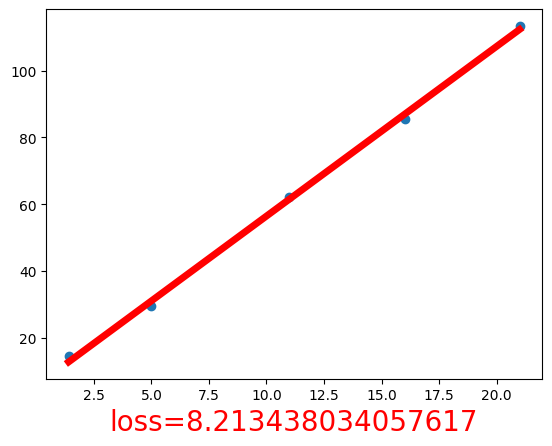

In [11]:
x=torch.Tensor([1.4,5,11,16,21])
y=torch.Tensor([14.4,29.6,62,85.5,113.4])
X = produce_x(x)

inputs = X
target = y
w = torch.rand(2, requires_grad=True)
print(x)
print(X)
print(w)

w, loss = train(inputs, target, w, 10000, 1e-4)

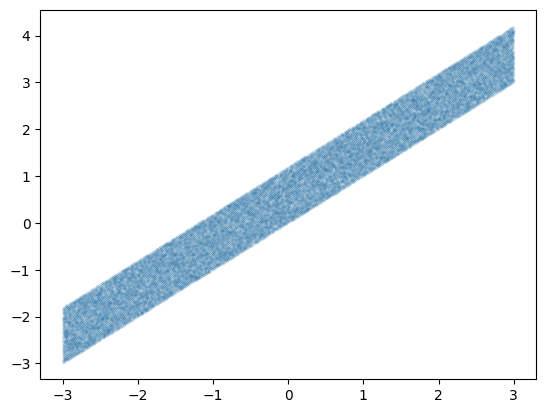

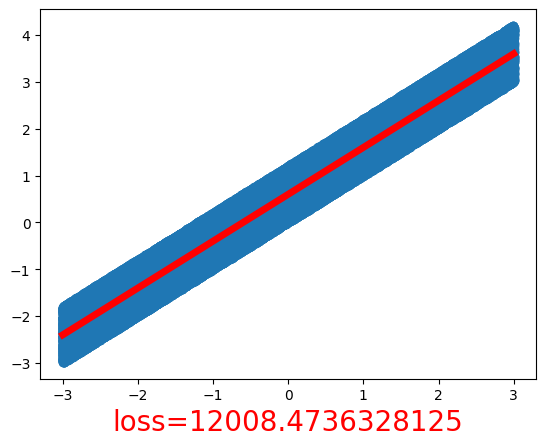

calculate time: 3.8384939999996277
final loss:12008.4736328125
weights: tensor([1.0001, 0.5996], device='cuda:0')


In [34]:
# 100000个数据样本
x = torch.linspace(-3, 3, 100000, )
X = produce_x(x)
y = x + 1.2*torch.rand(x.size(), )
w = torch.rand(2, )


plt.scatter(x.numpy(), y.numpy(), s=0.001)
plt.show()

inputs, outputs, parameters = try_cuda(X, y, w)
start = perf_counter()
w, loss = train(inputs, outputs, parameters, 10000, learning_rate=1e-6) # 学习率在1e-4时loss会变为nan？梯度爆炸？
finish = perf_counter()
cal_time = finish - start
print(f"calculate time: {cal_time}")
print(f"final loss:{loss.item()}")
print("weights:", w.data)


